In [2]:
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup

In [3]:
driver = webdriver.Chrome('chromedriver')

In [5]:
products = []
prices = []
images = []

driver.get('https://www.tokopedia.com/search?q=laptop&source=universe&st=product')

<html data-rh="lang" lang="id"><head>
<meta charset="utf-8"/>
<meta content="initial-scale=1, minimum-scale=1, maximum-scale=5, user-scalable=yes, width=device-width" name="viewport"/>
<link crossorigin="" href="https://ecs7.tokopedia.net" rel="preconnect"/><link href="https://ecs7.tokopedia.net" rel="dns-prefetch"/>
<link crossorigin="" href="https://gql.tokopedia.com" rel="preconnect"/><link href="https://gql.tokopedia.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://adservice.google.com" rel="preconnect"/><link href="https://adservice.google.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://certify-js.alexametrics.com" rel="preconnect"/><link href="https://certify-js.alexametrics.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://hub.tokopedia.com" rel="preconnect"/><link href="https://hub.tokopedia.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://sslwidget.criteo.com" rel="preconnect"/><link href="https://sslwidget.criteo.com" rel="dns-p
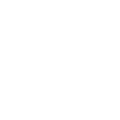
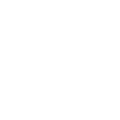
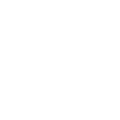
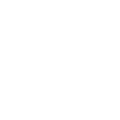
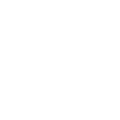
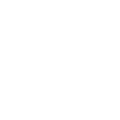
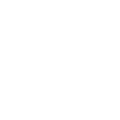
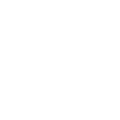
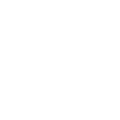
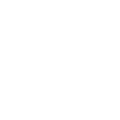
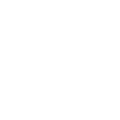
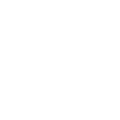
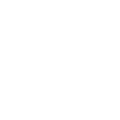
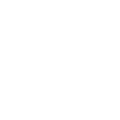
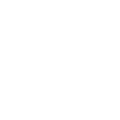
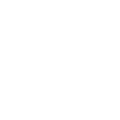
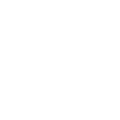
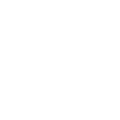
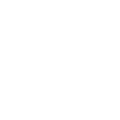
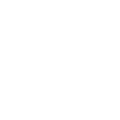
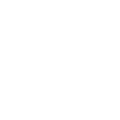
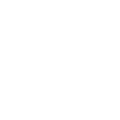
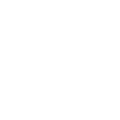
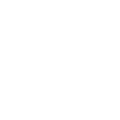
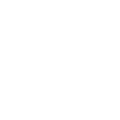
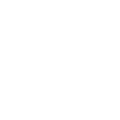
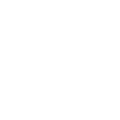
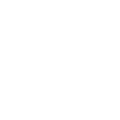
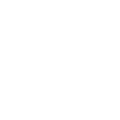
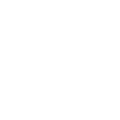
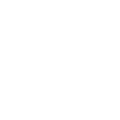
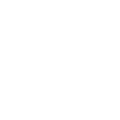
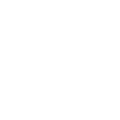
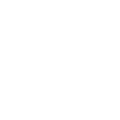
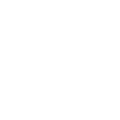
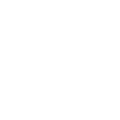
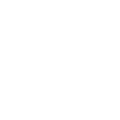
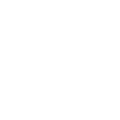
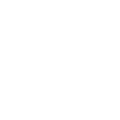
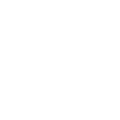
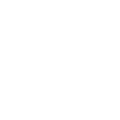
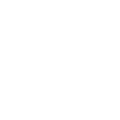
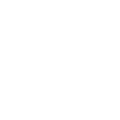
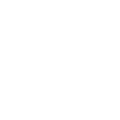
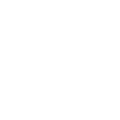
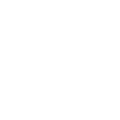
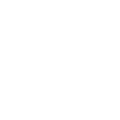
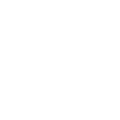
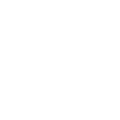
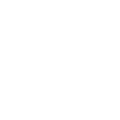
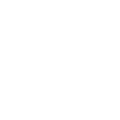
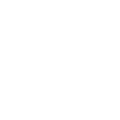
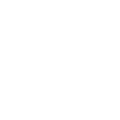
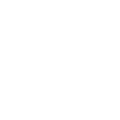
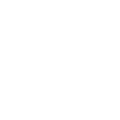
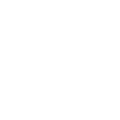
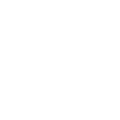
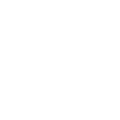
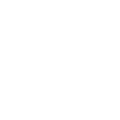
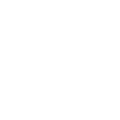
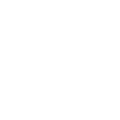
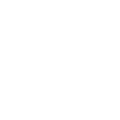
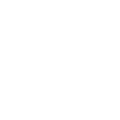
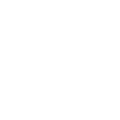
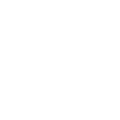
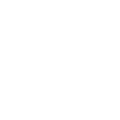
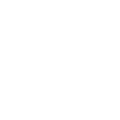
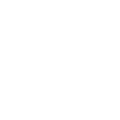
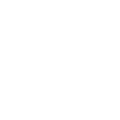
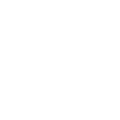

In [7]:
content = driver.page_source
soup = BeautifulSoup(content)
soup

<div class="css-1g20a2m"><div class="css-oynulx"><div class="css-o1ozdj" data-action="false" data-testid="divProductWrapper"><div class="css-wlcnlb" data-testid="master-product-card"><div class="unf-card css-rs4sgo-unf-card eue3g1e0"><div class="pcv3__container css-1bd8ct"><div class="css-1ehqh5q"><a href="https://ta.tokopedia.com/promo/v1/clicks/8a-xgVY2gmUEo_rd6_JaoAKDUMVj9RzNrc1i6sJDUSC5rfB7q3YXUsthbm-7q3OBUsthosnhHpnOoAnObm-srcHi6syFHmFiy3zwrfo5rM1i6sUdHmdfoA1FH_U7opyRHsHpbm-pHOYDQfri6i-B812kgJxGgBBXZSgjH7NDZ325q1OAZ9o-Q1dFyfFN8B29zSBgHMP2_fB-81N2oA-6qBja_M2gHjNk3_-6qBja_M2Sq1hAZS-q3cFpysoGqOKp_M2iH72DZ325q1OAZ9o-Q_ufyMO6QJBkQfBvzO223MOu8B2k_9z6z77O_jHFHJY91M2HucDp33O-PJY13_u6zOBE_1Pqq7OJ_MO-q9P2ysoGrVtaQIuyHB-Dy7yNrV2AZ_g-qjV2_JoGPMoWQcNxupuMy7xGPB2UuM2jzsBF3jo-ojBke3BHe72fyfODQMV9o3gsHMxfy7yNrV2AZ_g-qjV2_JoG8cz9uSBBusjF3uPj8jBkQfBizJ2pysoj6cgU_sCi3IKdyjzcrfUpgAxMzRPE3I2zP7OJgfBHe72E3_UN8u2363BsQ_jpyp-uq1Y2Z9BvuJOO_7zVoJOkgpCvzcWE_1zo8jNku3BHe72E3_UN8u23692qu7gN3_-Sq1Y2Z9BvzJVO_M2
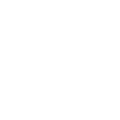
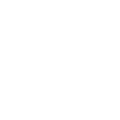
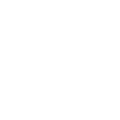
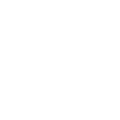
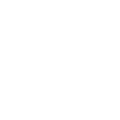
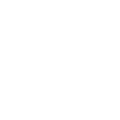
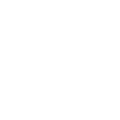
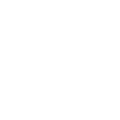
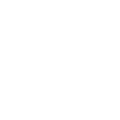
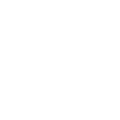
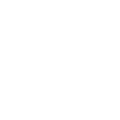
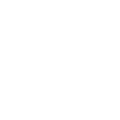
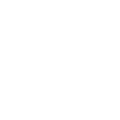
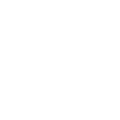
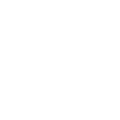
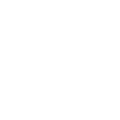
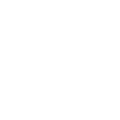
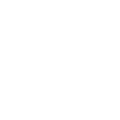
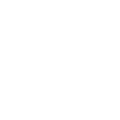
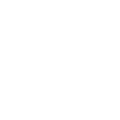
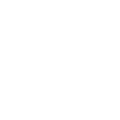
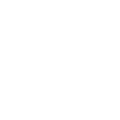
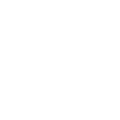
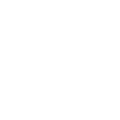
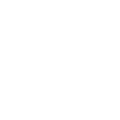
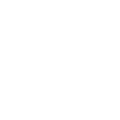
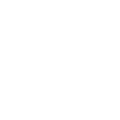
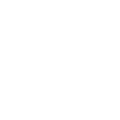
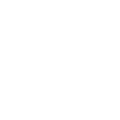
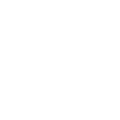
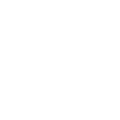
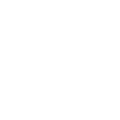
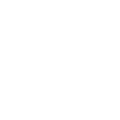
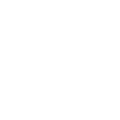
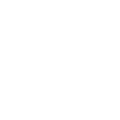
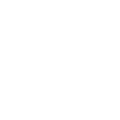
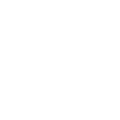
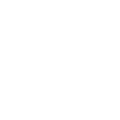
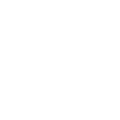
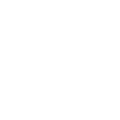
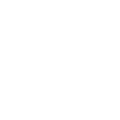
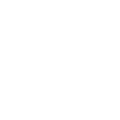
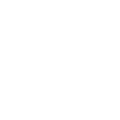
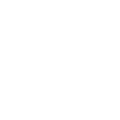
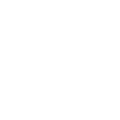
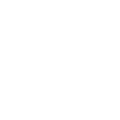
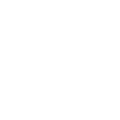
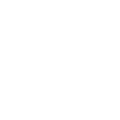
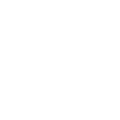
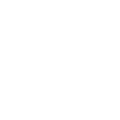
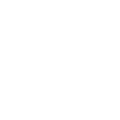
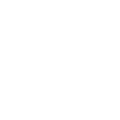
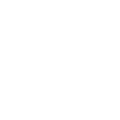
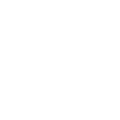
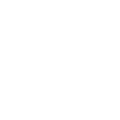
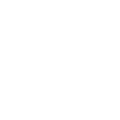
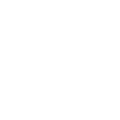
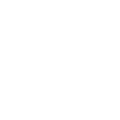
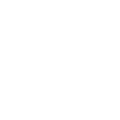
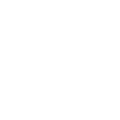
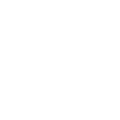
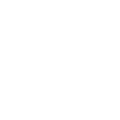
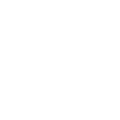
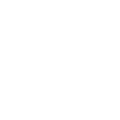
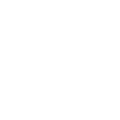
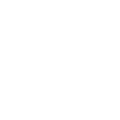
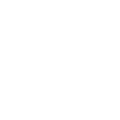
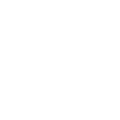
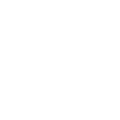
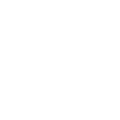

In [14]:
for link in soup.find_all('div', class_ = 'css-1g20a2m'):
    print(link)

In [26]:
for link in soup.find_all('div', class_ = "css-1g20a2m"):
    dataImg = link.find('img', class_ = "success fade")
    #print(dataImg['src'])
    name = link.find('div', class_ = "css-18c4yhp")
    #print(name.get_text())
    price = link.find('div', class_ = "css-rhd610")
    #print(price.get_text())
    products.append(name.get_text())
    prices.append(price.get_text())
    #images.append(dataImg['src'])

In [28]:
df = pd.DataFrame({
    'Product Name' : products,
    'Price' : prices
})

In [29]:
df

,Product Name,Price
0,Laptop Gaming HP AMD 3.0GHZ 4GB RAM New Laptop...,Rp5.894.000
1,Laptop Lenovo IdeaPad Slim 3i i3-1005G1 256GB ...,Rp6.299.000
2,Murah Laptop Gaming Toshiba Z50A RAM 8GB VGA 1...,Rp4.700.000
3,Laptop ASUS A555LF (A555L) Intel Core i5-5200U...,Rp5.000.000
4,Laptop HP Pro X2 612 Core i5 Gen4 4GB SSD 128G...,Rp3.650.000
...,...,...
86,Lenovo Notebook V14-IIL i3-1005G1 Gen10 4GB 1T...,Rp5.750.000
87,"Asus Notebook Laptop E402YA E2 7015 4GB 1TB14""...",Rp3.359.000
88,LAPTOP BEKAS CORE I5 GEN 3 LENOVO THINKPAD L53...,Rp2.374.000
89,Laptop HP 14inch Notebook Hp 14,Rp3.849.000


In [30]:
df.to_csv('tokopedia.csv', index = False, encoding = 'UTF-8')

In [33]:
df.to_json('tokopedia.json')